In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%cd ..

d:\Projects\my-ds-template


## 1. Data overview

In [2]:
df_growth = pd.read_csv('data/processed/genshin_character_growth.csv')
df_lv_90 = pd.read_csv('data/processed/genshin_character_lv_90.csv')

In [16]:
# number of categories
# balance between categories
categorical_var_columns = [
                       'Rarity',
                       'Weapon',
                       'Region',
                       'Model Type',
                       'Main role',
                       'Ascension Stat'
                        ]
# min, max, mean, std
# distribution
continue_var_columns = [
                    'Base HP',
                    'Base ATK',
                    'Base DEF',
                    # 'Ascension',
                    # 'Lv'
                    ]

## 2. Frequency Distribution

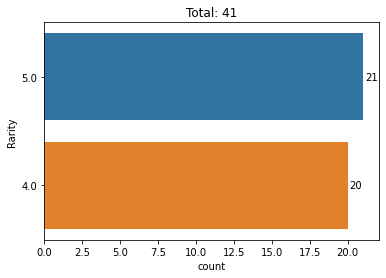

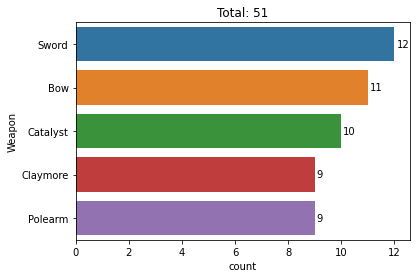

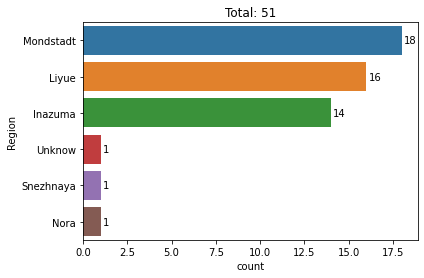

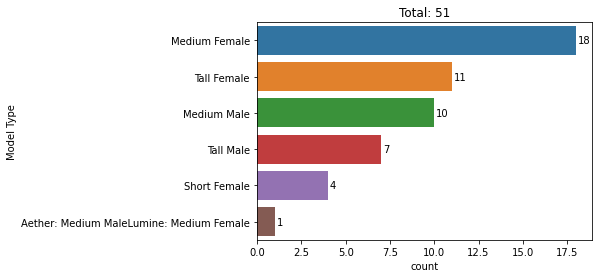

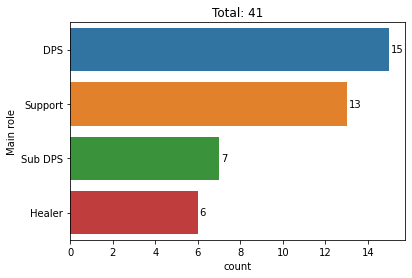

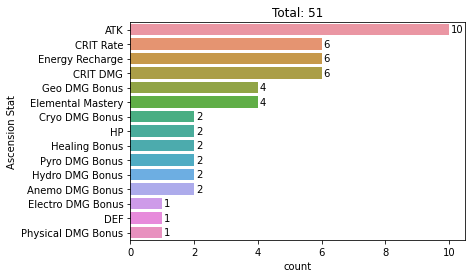

In [12]:
for c in categorical_var_columns:
    plt.figure()
    # order bars by count 
    ax = sns.countplot(y=c, data=df_lv_90[~df_lv_90[c].isna()], order=df_lv_90[c].value_counts().index)
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%g', label_type='edge', padding=2)
    plt.title(f'Total: {sum(~df_lv_90[c].isna())}')

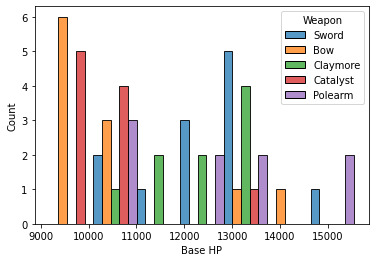

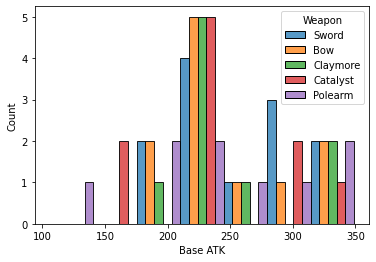

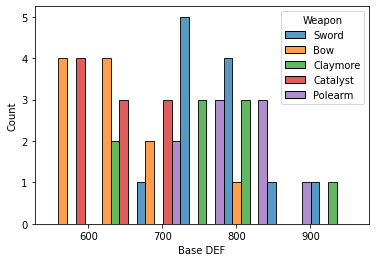

In [19]:
for c in continue_var_columns:
    plt.figure()
    sns.histplot(x=c, data=df_lv_90, multiple="dodge", hue='Weapon')  # , hue='Main role' Weapon, Main role

## Measures of Central Tendency

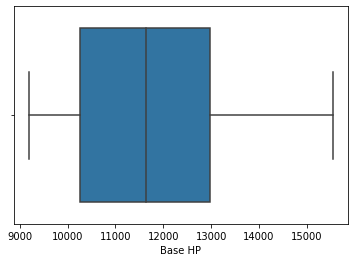

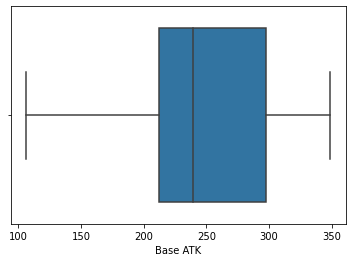

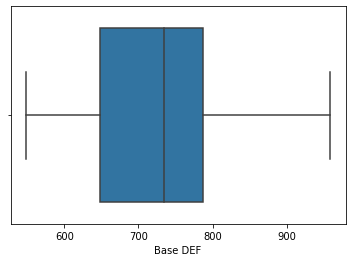

In [20]:
for c in ['Base HP','Base ATK','Base DEF']:
    plt.figure()
    sns.boxplot(x=c, data=df_lv_90)

In [17]:
df_lv_90[continue_var_columns].describe()

,Base HP,Base ATK,Base DEF
count,51.000000,51.000000,51.000000
mean,11631.254902,249.411765,717.039216
std,1678.799915,55.518709,96.404141
min,9189.000000,106.000000,548.000000
25%,10255.000000,212.000000,648.000000
50%,11636.000000,239.000000,734.000000
75%,12987.000000,298.000000,786.500000
max,15552.000000,349.000000,959.000000


In [22]:
pd.concat([df_lv_90.sort_values(by='Base HP').head(3),df_lv_90.sort_values(by='Base HP').tail(3)])

,ID,Character,Base HP,Base ATK,Base DEF,Ascension Stat,Ascension Stat Value,Element,Weapon,Model Type,Region,Rarity,Main role
11,fischl,Fischl,9189,244,594,ATK,24.0%,Electro,Bow,Medium Female,Mondstadt,4.0,Sub DPS
36,sucrose,Sucrose,9243,170,703,Anemo DMG Bonus,24.0%,Anemo,Catalyst,Medium Female,Mondstadt,4.0,Support
46,yanfei,Yanfei,9352,240,587,Pyro DMG Bonus,24.0%,Pyro,Catalyst,Medium Female,Liyue,4.0,DPS
15,jean,Jean,14695,239,769,Healing Bonus,22.2%,Anemo,Sword,Tall Female,Mondstadt,5.0,Healer
50,zhongli,Zhongli,14695,251,738,Geo DMG Bonus,28.8%,Geo,Polearm,Tall Male,Liyue,5.0,Support
14,hutao,Hu Tao,15552,106,876,CRIT DMG,38.4%,Pyro,Polearm,Medium Female,Liyue,5.0,DPS


In [23]:
pd.concat([df_lv_90.sort_values(by='Base ATK').head(3),df_lv_90.sort_values(by='Base ATK').tail(3)])

,ID,Character,Base HP,Base ATK,Base DEF,Ascension Stat,Ascension Stat Value,Element,Weapon,Model Type,Region,Rarity,Main role
14,hutao,Hu Tao,15552,106,876,CRIT DMG,38.4%,Pyro,Polearm,Medium Female,Liyue,5.0,DPS
4,barbara,Barbara,9787,159,669,HP,24.0%,Hydro,Catalyst,Medium Female,Mondstadt,4.0,Healer
36,sucrose,Sucrose,9243,170,703,Anemo DMG Bonus,24.0%,Anemo,Catalyst,Medium Female,Mondstadt,4.0,Support
18,kamisatoayaka,Kamisato Ayaka,12858,342,784,CRIT DMG,38.4%,Cryo,Sword,Medium Female,Inazuma,5.0,DPS
10,eula,Eula,13226,342,751,CRIT DMG,38.4%,Cryo,Claymore,Tall Female,Mondstadt,5.0,DPS
42,xiao,Xiao,12736,349,799,CRIT Rate,19.2%,Anemo,Polearm,Medium Male,Liyue,5.0,DPS


In [24]:
pd.concat([df_lv_90.sort_values(by='Base DEF').head(3),df_lv_90.sort_values(by='Base DEF').tail(3)])

,ID,Character,Base HP,Base ATK,Base DEF,Ascension Stat,Ascension Stat Value,Element,Weapon,Model Type,Region,Rarity,Main role
47,yelan,Yelan,14450,244,548,CRIT Rate,19.2%,Hydro,Bow,Tall Female,Liyue,NaN,NaN
45,yaemiko,Yae Miko,10372,340,569,CRIT Rate,19.2%,Electro,Catalyst,Tall Female,Inazuma,NaN,NaN
26,ningguang,Ningguang,9787,212,573,Geo DMG Bonus,24.0%,Geo,Catalyst,Tall Female,Liyue,4.0,DPS
0,albedo,Albedo,13226,251,876,Geo DMG Bonus,28.8%,Geo,Sword,Medium Male,Mondstadt,5.0,Support
28,qiqi,Qiqi,12368,287,922,Healing Bonus,22.2%,Cryo,Sword,Short Female,Liyue,5.0,Healer
3,aratakiitto,Arataki Itto,12858,227,959,CRIT Rate,19.2%,Geo,Claymore,Tall Male,Inazuma,NaN,NaN


## Outliers/Anomalies

In [30]:
df_lv_90.drop_duplicates(['Ascension Stat', 'Ascension Stat Value'], keep=False).sort_values(by='Ascension Stat')

,ID,Character,Base HP,Base ATK,Base DEF,Ascension Stat,Ascension Stat Value,Element,Weapon,Model Type,Region,Rarity,Main role
34,shenhe,Shenhe,12993,304,830,ATK,28.8%,Cryo,Polearm,Tall Female,Liyue,NaN,NaN
1,aloy,Aloy,10899,234,676,Cryo DMG Bonus,28.8%,Cryo,Bow,Medium Female,Unknow,5.0,DPS
9,diona,Diona,9570,212,601,Cryo DMG Bonus,24.0%,Cryo,Bow,Short Female,Mondstadt,4.0,Support
27,noelle,Noelle,12071,191,799,DEF,30.0%,Geo,Claymore,Medium Female,Mondstadt,4.0,Support
5,beidou,Beidou,13050,225,648,Electro DMG Bonus,24.0%,Electro,Claymore,Tall Female,Liyue,4.0,Sub DPS
16,kaedeharakazuha,Kaedehara Kazuha,13348,297,807,Elemental Mastery,115.2,Anemo,Sword,Medium Male,Inazuma,5.0,Support
30,razor,Razor,11962,234,751,Physical DMG Bonus,30.0%,Electro,Claymore,Medium Male,Mondstadt,4.0,DPS
21,klee,Klee,10287,311,615,Pyro DMG Bonus,28.8%,Pyro,Catalyst,Short Female,Mondstadt,5.0,DPS
46,yanfei,Yanfei,9352,240,587,Pyro DMG Bonus,24.0%,Pyro,Catalyst,Medium Female,Liyue,4.0,DPS


- Assumptions  
- Outliers/Anomalies  
